In [ ]:
import pandas as pd
from cmdstanpy import CmdStanModel
import numpy as np
import cmdstanpy

In [ ]:
cmdstanpy.install_cmdstan()

CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.36.0
Download successful, file: /tmp/tmpz3d_i_jy
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.36.0
Building version cmdstan-2.36.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.36.0
Test model compilation


True

In [ ]:
# Create the Stan model file
stan_code = """

data {
  int<lower=1> N;               // number of observations
  vector[N] y;                  // outcome (e.g., Length of Stay)
  vector[N] x;                  // covariate (Butterfly_1_0)
}

parameters {
  simplex[2] theta;             // mixing proportions
  ordered[2] intercept;         // ordered intercepts to break symmetry
  vector[2] beta;               // covariate effects
  vector<lower=0>[2] shape;     // gamma shape parameters
}

model {
  array[N] vector[2] log_lik;

  // stronger priors for stability
  intercept ~ normal(0, 1);
  beta ~ normal(0, 1);
  shape ~ gamma(2, 0.5);

  for (n in 1:N) {
    for (k in 1:2) {
      real rate = exp(-(intercept[k] + beta[k] * x[n]));
      log_lik[n, k] = log(theta[k]) + gamma_lpdf(y[n] | shape[k], rate);
    }
  }

  for (n in 1:N)
    target += log_sum_exp(log_lik[n]);
}

generated quantities {
  // Posterior probabilities of component assignments
  matrix[N, 2] component_probs;

  for (n in 1:N) {
    vector[2] log_lik_n;
    for (k in 1:2) {
      real rate = exp(-(intercept[k] + beta[k] * x[n]));
      log_lik_n[k] = log(theta[k]) + gamma_lpdf(y[n] | shape[k], rate);
    }
    component_probs[n,] = to_row_vector(softmax(log_lik_n));
  }
}







"""

In [ ]:
with open("gamma_mixture.stan", "w") as f:
    f.write(stan_code)

print("gamma_mixture.stan created successfully with updated syntax.")


gamma_mixture.stan created successfully with updated syntax.


In [ ]:
import pandas as pd
from cmdstanpy import CmdStanModel

# Load data
df = pd.read_csv("BUTTERFLY.csv")
df = df.dropna(subset=['Length of stay (days)', 'Butterfly_1_0'])

# Prepare data for Stan
data = {
    'N': len(df),
    'y': df['Length of stay (days)'].values,
    'x': df['Butterfly_1_0'].values
}

# Compile and fit model
model = CmdStanModel(stan_file='gamma_mixture.stan')
fit   = model.sample(data=data, chains=4, parallel_chains=4, iter_warmup=2000, iter_sampling=4000, seed=42)

# Print summary
print(fit.summary())

14:29:30 - cmdstanpy - INFO - compiling stan file /content/gamma_mixture.stan to exe file /content/gamma_mixture
INFO:cmdstanpy:compiling stan file /content/gamma_mixture.stan to exe file /content/gamma_mixture
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=gamma_mixture.stan /content/gamma_mixture
cwd: /root/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=gamma_mixture.stan --o=/content/gamma_mixture.hpp /content/gamma_mixture.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/gamma_mixture', 'id=1', 'random', 'seed=42', 'data', 'file=/tmp/tmpx4eg129u/x49qkaob.json', 'output', 'file=/tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_1.csv', 'method=sample', 'num_samples=4000', 'num_warmup=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/gamma_mixture', 'id=2', 'random', 'seed=42', 'data', 'file=/tmp/tmpx4eg129u/x49qkaob.json', 'output', 'file=/tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_2.csv', 'method=sample', 'num_samples=4000', 'num_warmup=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/gamma_mixture', 'id=3', 'random', 'seed=42', 'data', 'file=/tmp/tmpx4eg129u/x49qkaob.json', 'output', 'file=/

14:31:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/gamma_mixture', 'id=1', 'random', 'seed=42', 'data', 'file=/tmp/tmpx4eg129u/x49qkaob.json', 'output', 'file=/tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_1.csv', 'method=sample', 'num_samples=4000', 'num_warmup=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_1.csv
 console_msgs (if any):
	/tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 4000
    num_warmup = 2000
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
      delta = 

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpx4eg129u/stansummary-gamma_mixture-ad_b2axb.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_1.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_2.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_3.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_4.csv
cwd: None


                              Mean      MCSE    StdDev       MAD          5%  \
lp__                   -643.377000  0.026776  1.953090  1.811740 -647.010000   
theta[1]                  0.784078  0.001429  0.091485  0.094367    0.618374   
theta[2]                  0.215922  0.001429  0.091485  0.094367    0.088973   
intercept[1]              0.607073  0.004164  0.254636  0.256089    0.165826   
intercept[2]              2.331030  0.003128  0.282793  0.273258    1.868200   
...                            ...       ...       ...       ...         ...   
component_probs[205,2]    0.181754  0.002014  0.132322  0.125741    0.017799   
component_probs[206,1]    0.944573  0.000900  0.062317  0.045928    0.817563   
component_probs[206,2]    0.055427  0.000900  0.062317  0.045928    0.000150   
component_probs[207,1]    0.936632  0.000837  0.056798  0.054747    0.827416   
component_probs[207,2]    0.063368  0.000837  0.056798  0.054748    0.001167   

                               50%     

In [ ]:
# Extract component probabilities (returns a 3D array: [draws, N, 2])
component_probs = fit.stan_variable('component_probs')
# Calculate posterior mean probabilities (average across all draws)
mean_component_probs = component_probs.mean(axis=0)
# Add to original dataframe
df['prob_component1'] = mean_component_probs[:, 0]
df['prob_component2'] = mean_component_probs[:, 1]
# You can also get the most likely component for each observation
df['most_likely_component'] = np.argmax(mean_component_probs, axis=1) + 1
print(df[['Length of stay (days)', 'Butterfly_1_0', 'prob_component1', 'prob_component2', 'most_likely_component']].head())

   Length of stay (days)  Butterfly_1_0  prob_component1  prob_component2  \
0                   27.0              0         0.077291         0.922709   
1                   16.0              0         0.576503         0.423497   
2                   13.0              0         0.763412         0.236588   
3                   11.0              0         0.858047         0.141953   
4                   31.0              0         0.027243         0.972757   

   most_likely_component  
0                      2  
1                      1  
2                      1  
3                      1  
4                      2  


In [ ]:
df.to_csv('results.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

# Extract posterior samples as a DataFrame
posterior_samples = fit.draws_pd()

# List of parameters to summarize
parameters = ['theta[1]', 'theta[2]', 'intercept[1]', 'intercept[2]',
              'beta[1]', 'beta[2]', 'shape[1]', 'shape[2]']

# Compute desired summary statistics
summary_stats = {}
for param in parameters:
    draws = posterior_samples[param]
    summary_stats[param] = {
        'Mean': np.mean(draws),
        '2.5%': np.percentile(draws, 2.5),
        '5%': np.percentile(draws, 5),
        '25%': np.percentile(draws, 25),
        '50%': np.percentile(draws, 50),
        '75%': np.percentile(draws, 75),
        '95%': np.percentile(draws, 95),
        '97.5%': np.percentile(draws, 97.5)
    }

# Convert to DataFrame
summary_df = pd.DataFrame(summary_stats).T

fit_summary = fit.summary()
summary_df['ESS_bulk'] = fit_summary.loc[parameters, 'ESS_bulk']
summary_df['ESS_tail'] = fit_summary.loc[parameters, 'ESS_tail']
summary_df['R_hat'] = fit_summary.loc[parameters, 'R_hat']
summary_df

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpx4eg129u/stansummary-gamma_mixture-8xdmvi0v.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_1.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_2.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_3.csv /tmp/tmpx4eg129u/gamma_mixturepi93kno3/gamma_mixture-20250706142955_4.csv
cwd: None


,Mean,2.5%,5%,25%,50%,75%,95%,97.5%,ESS_bulk,ESS_tail,R_hat
theta[1],0.784078,0.580545,0.618374,0.725113,0.796232,0.854587,0.911027,0.923111,4057.45,6675.84,1.00132
theta[2],0.215922,0.076889,0.088973,0.145413,0.203768,0.274886,0.381626,0.419455,4057.46,6675.84,1.00132
intercept[1],0.607073,0.080313,0.165826,0.442036,0.619187,0.787429,1.000777,1.065101,3773.67,5276.95,1.00127
intercept[2],2.331035,1.763200,1.868199,2.145777,2.332075,2.514405,2.789579,2.891705,8402.44,6563.54,1.00067
beta[1],-0.173953,-0.374059,-0.341235,-0.242585,-0.175683,-0.105897,-0.004893,0.031300,9606.08,8744.87,1.00087
beta[2],-0.569766,-1.043574,-0.961324,-0.725072,-0.567421,-0.414873,-0.189717,-0.110139,8543.56,8453.96,1.00060
shape[1],3.983081,2.846453,2.977805,3.467977,3.889520,4.388155,5.321328,5.700124,4218.42,5257.75,1.00107
shape[2],3.303008,1.523121,1.658438,2.188098,2.812400,3.871665,6.717643,7.898362,4515.84,4996.70,1.00144


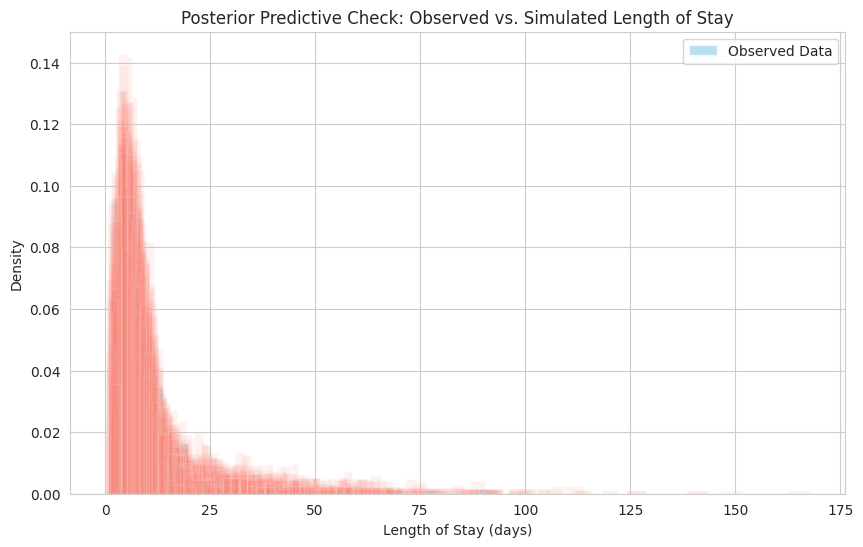

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")

# Simulate data from the posterior predictive distribution
num_posterior_samples_to_plot = 100 # Number of posterior samples to use for simulation
simulated_data = []

# Get observed covariate data
x_observed = df['Butterfly_1_0'].values

for i in np.random.choice(len(posterior_samples), num_posterior_samples_to_plot, replace=False):
    # Extract parameters for the current sample
    theta1 = posterior_samples['theta[1]'].iloc[i]
    theta2 = posterior_samples['theta[2]'].iloc[i]
    intercept1 = posterior_samples['intercept[1]'].iloc[i]
    intercept2 = posterior_samples['intercept[2]'].iloc[i]
    beta1 = posterior_samples['beta[1]'].iloc[i]
    beta2 = posterior_samples['beta[2]'].iloc[i]
    shape1 = posterior_samples['shape[1]'].iloc[i]
    shape2 = posterior_samples['shape[2]'].iloc[i]

    simulated_los = []
    for j in range(len(x_observed)):
        # Normalize probabilities to ensure they sum to 1
        probabilities = np.array([theta1, theta2])
        probabilities /= probabilities.sum()

        # Determine which component the observation belongs to (sampling from a Bernoulli based on normalized theta)
        component = np.random.choice([0, 1], p=probabilities)

        # Calculate the rate parameter for the chosen component and observed x
        if component == 0:
            rate = np.exp(-(intercept1 + beta1 * x_observed[j]))
            # Simulate from Gamma distribution (using shape and rate)
            # Ensure rate is positive finite before sampling
            if rate > 0 and np.isfinite(rate):
                simulated_los.append(np.random.gamma(shape1, scale=1/rate)) # scale = 1/rate for numpy's gamma
            else:
                # Handle cases with non-positive or infinite rates, e.g., append NaN or a default value
                simulated_los.append(np.nan) # Appending NaN for problematic samples
        else:
            rate = np.exp(-(intercept2 + beta2 * x_observed[j]))
             # Ensure rate is positive finite before sampling
            if rate > 0 and np.isfinite(rate):
                simulated_los.append(np.random.gamma(shape2, scale=1/rate))
            else:
                 # Handle cases with non-positive or infinite rates
                simulated_los.append(np.nan) # Appending NaN for problematic samples


    simulated_data.append(simulated_los)

# Plot observed and simulated data
plt.figure(figsize=(10, 6))

# Plot observed data histogram
plt.hist(df['Length of stay (days)'].values, bins=30, density=True, alpha=0.6, color='skyblue', label='Observed Data')

# Plot simulated data histograms, filtering out NaNs if any were introduced
for sim_data in simulated_data:
    sim_data_cleaned = [x for x in sim_data if not np.isnan(x)] # Filter out NaNs
    if sim_data_cleaned: # Plot only if there's valid data
        plt.hist(sim_data_cleaned, bins=30, density=True, alpha=0.1, color='salmon') # Use lower alpha for simulated data

plt.xlabel("Length of Stay (days)")
plt.ylabel("Density")
plt.title("Posterior Predictive Check: Observed vs. Simulated Length of Stay")
plt.legend()
plt.show()